In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime

In [ ]:
def plot_wealth_index(portfolio_returns, initial_amount, timestamp, model_version, root_dir):
    # need to insert a row of 0s at the beginning so each line starts at the initial amount
    first_date = portfolio_returns.index[0]
    previous_month_end = first_date - relativedelta(months=1)
    new_row_values = [0] * len(portfolio_returns.columns)
    portfolio_returns = pd.concat([pd.DataFrame([new_row_values], columns=portfolio_returns.columns, index=[previous_month_end]), portfolio_returns], axis=0)

    # now calculate cumulative rets and wealth index
    cumulative_rets = (1 + portfolio_returns).cumprod()
    wealth_index = initial_amount * cumulative_rets

    plt.figure(figsize=(10, 6))
    for column in wealth_index.columns:
        plt.plot(wealth_index.index, wealth_index[column], label=column)

    plt.xlabel('Date')
    plt.ylabel('Wealth Index')
    plt.title('Wealth Index Over Time')
    plt.legend()
    plt.grid(True)

    plt.savefig(os.path.join(root_dir, f'wealth_index_{model_version}_{timestamp}.png'))

In [ ]:
timestamp = '20240517'
initial_amount = 1000

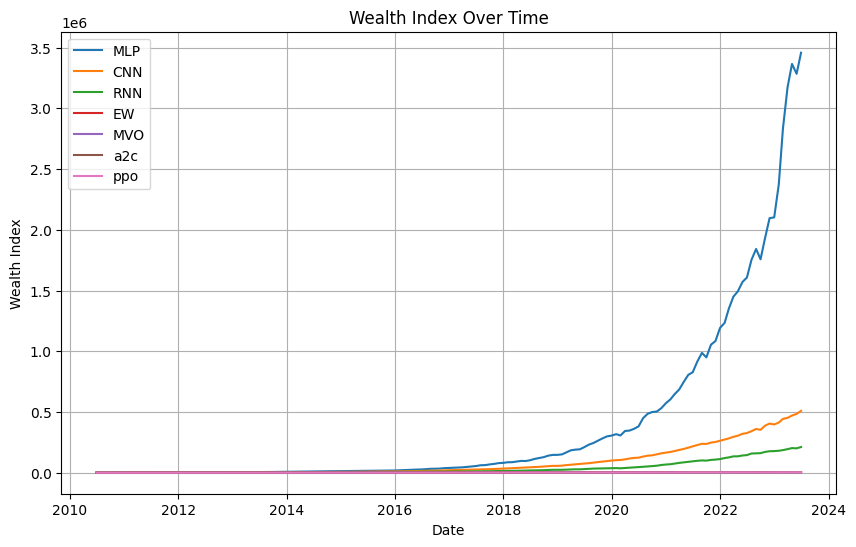

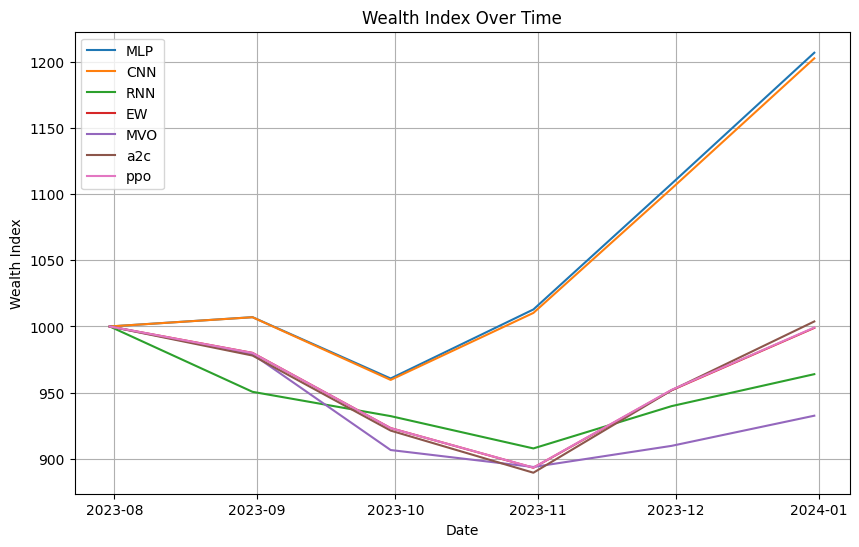

In [ ]:
for sample in['train', 'test']:
  nn_rets = pd.read_csv(f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/model_data/20240517_203713/{sample}_rets.csv")
  mvo_rets = pd.read_csv(f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/20240517/{sample}_mvo_rets.csv")
  rl_rets = pd.read_csv(f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/RL/models/20240517_201253/{sample}_rets.csv")
  sample_rets = nn_rets.merge(mvo_rets, on='Date').merge(rl_rets, on='Date').set_index('Date')
  sample_rets.index = pd.to_datetime(sample_rets.index)

  nn_metrics = pd.read_csv(f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/model_data/20240517_203713/{sample}_metrics.csv")
  mvo_metrics = pd.read_csv(f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/20240517/{sample}_mvo_metrics.csv")
  rl_metrics = pd.read_csv(f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/RL/models/20240517_201253/{sample}_metrics.csv")

  sample_metrics = nn_metrics.merge(mvo_metrics, on='Unnamed: 0').merge(rl_metrics, on='Unnamed: 0').rename(columns={'Unnamed: 0': 'Metric'})


  os.makedirs(f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/{timestamp}/", exist_ok=True)

  sample_metrics.to_csv(f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/{timestamp}/{sample}_metrics.csv", index=False)

  plot_wealth_index(sample_rets, initial_amount, timestamp, sample, f"/content/drive/My Drive/CapstoneProject/CapstoneModularity/WQU_5457/data/{timestamp}/")